In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from feature_extractor import *
from cluster_events import *
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import RandomForest as rf
import KNN as knn
from sklearn.metrics import accuracy_score, fbeta_score
from sklearn.naive_bayes import GaussianNB
import GaussianNaiveBayes as gnb
import neaural_net as nn
import logisitic_regression as log_reg
import dummy_classifier as dumm
import svm as svm
import EnsembleLearning as el
from wordcloud import WordCloud
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.decomposition import PCA 

In [2]:
dataPath = './data/'
outputPath = './results/'

In [91]:
events = pd.read_csv(dataPath + 'events.csv')

In [4]:
events = events.iloc[:, 9:-1]

In [6]:
s = events.sum()

In [7]:
events.head

<bound method NDFrame.head of          c_1  c_2  c_3  c_4  c_5  c_6  c_7  c_8  c_9  c_10  ...  c_91  c_92  \
0          2    0    2    0    0    0    0    0    0     0  ...     0     0   
1          2    0    2    0    0    0    0    0    0     0  ...     0     0   
2          0    0    0    0    0    0    0    0    0     0  ...     0     0   
3          1    0    2    1    0    0    0    0    0     0  ...     0     0   
4          1    1    0    0    0    0    0    2    0     0  ...     0     0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...   ...   ...   
3137967    0    0    0    0    0    3    0    0    0     0  ...     0     0   
3137968    0    0    0    0    0    0    0    0    0     0  ...     0     0   
3137969    0    0    0    0    0    0    0    0    0     0  ...     0     0   
3137970    2    3    8    3    3    0    0    3    1     2  ...     1     1   
3137971    0    0    0    0    0    0    0    0    0     0  ...     0     0   

         c_93  c_94  

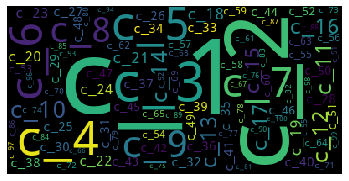

In [8]:
bow = s
wordcloud = WordCloud().generate_from_frequencies(bow)
plt.
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig(outputPath + 'wordcloud.png')

In [9]:
y = s.to_numpy()
# arr
x = events.columns.to_numpy()
print(x)
print(y)

['c_1' 'c_2' 'c_3' 'c_4' 'c_5' 'c_6' 'c_7' 'c_8' 'c_9' 'c_10' 'c_11'
 'c_12' 'c_13' 'c_14' 'c_15' 'c_16' 'c_17' 'c_18' 'c_19' 'c_20' 'c_21'
 'c_22' 'c_23' 'c_24' 'c_25' 'c_26' 'c_27' 'c_28' 'c_29' 'c_30' 'c_31'
 'c_32' 'c_33' 'c_34' 'c_35' 'c_36' 'c_37' 'c_38' 'c_39' 'c_40' 'c_41'
 'c_42' 'c_43' 'c_44' 'c_45' 'c_46' 'c_47' 'c_48' 'c_49' 'c_50' 'c_51'
 'c_52' 'c_53' 'c_54' 'c_55' 'c_56' 'c_57' 'c_58' 'c_59' 'c_60' 'c_61'
 'c_62' 'c_63' 'c_64' 'c_65' 'c_66' 'c_67' 'c_68' 'c_69' 'c_70' 'c_71'
 'c_72' 'c_73' 'c_74' 'c_75' 'c_76' 'c_77' 'c_78' 'c_79' 'c_80' 'c_81'
 'c_82' 'c_83' 'c_84' 'c_85' 'c_86' 'c_87' 'c_88' 'c_89' 'c_90' 'c_91'
 'c_92' 'c_93' 'c_94' 'c_95' 'c_96' 'c_97' 'c_98' 'c_99' 'c_100']
[7295265 5312437 4556323 3360911 3299885 3118456 2647285 2071713 2222708
 1937772 1771852 1724830 1597050 1591161 1314098 1421307 1301149 1220376
 1091978 1006170 1126811  922410  878864  880561  807250  778548  776122
  766675  563104  723000  708487  592254  712636  697868  617628  682391
  645

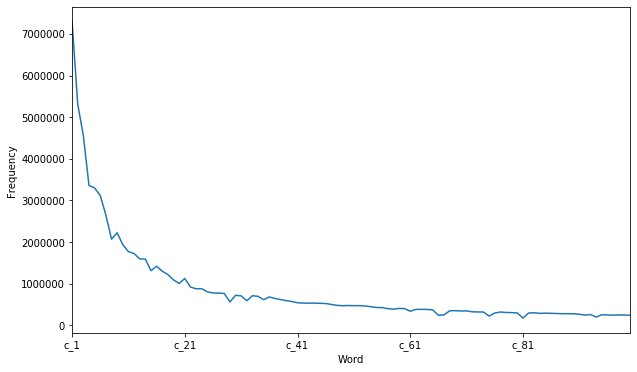

In [24]:
plt.figure(figsize = (10, 6))
plt.xlabel("Word")
plt.ylabel("Frequency")
# data = pd.DataFrame(data={'Word': x, 'Frequency': y})

# # Create lmplot
# lm = sns.lmplot('Word', 'Frequency', data, size=7, truncate=True, scatter_kws={"s": 100})

# # Access the Figure
# fig = lm.fig 

# # Add a title to the Figure
# fig.suptitle('this is the figure title', fontsize=12)

# # Show the plot
# plt.show()
# sns.regplot(x = x, y = y)
s.plot()
plt.savefig(outputPath + 'wordDistribution.png')

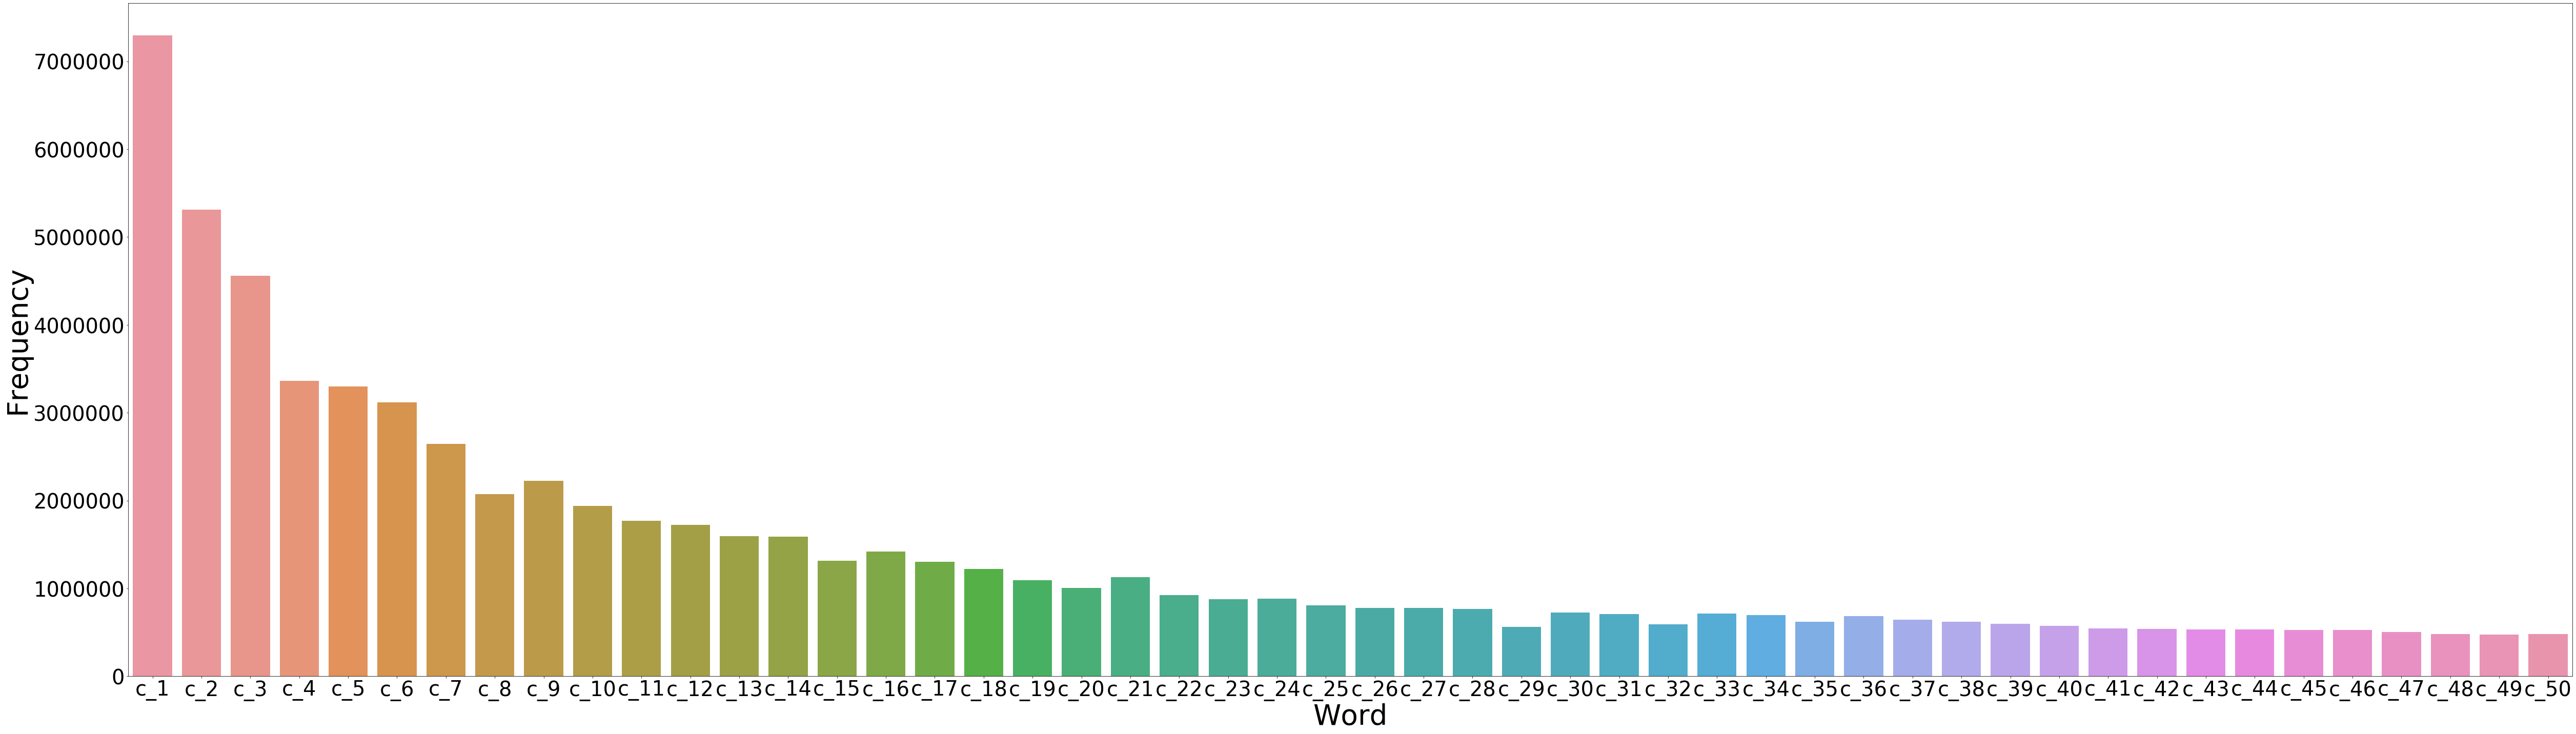

In [104]:
plt.figure(figsize=(70, 20))
plt.xlabel('Word', fontsize=55)
plt.ylabel('Frequency', fontsize=55)
sns.barplot(x = x[:50], y = y[:50])
# plt.show()
plt.tick_params(labelsize=40)
plt.tight_layout()
plt.savefig(outputPath + 'wordBarPlot.png')

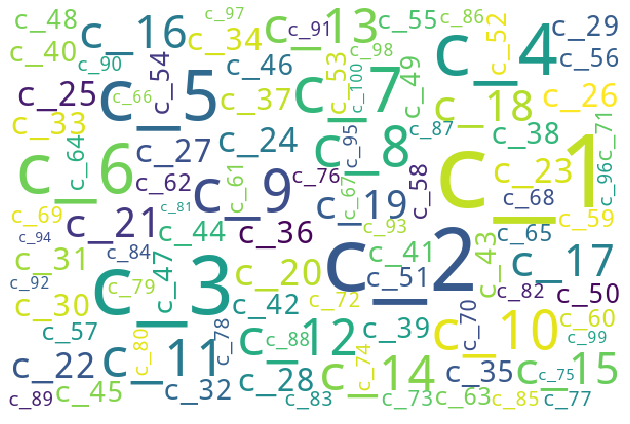

In [81]:
# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(background_color="white",max_words=100,max_font_size=100, relative_scaling=.5, width = 600, height = 400).generate_from_frequencies(bow)
plt.figure(figsize=(20, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout()
plt.savefig(outputPath + 'wordcloud.png')

In [88]:
#  Visualize clusters

event_clusters = pd.read_csv(dataPath + 'event_clusters_200.csv')

In [97]:
event_feats.shape

(3137972, 101)

In [102]:
event_feats.iloc[0]

c_1        2
c_2        0
c_3        2
c_4        0
c_5        0
          ..
c_97       0
c_98       0
c_99       0
c_100      0
c_other    9
Name: 0, Length: 101, dtype: int64

In [99]:
# event_clusters = event_clusters[['cluster']]
event_clusters.head

<bound method NDFrame.head of          cluster
0            195
1             39
2             33
3             58
4            195
...          ...
3137967       41
3137968       58
3137969       76
3137970       51
3137971       81

[3137972 rows x 1 columns]>

In [101]:
cluster_data = pd.merge(event_feats, event_clusters, left_index=True, right_index=True)
cluster_data.head

<bound method NDFrame.head of          c_1  c_2  c_3  c_4  c_5  c_6  c_7  c_8  c_9  c_10  ...  c_93  c_94  \
0          2    0    2    0    0    0    0    0    0     0  ...     1     0   
1          2    0    2    0    0    0    0    0    0     0  ...     0     0   
2          0    0    0    0    0    0    0    0    0     0  ...     0     0   
3          1    0    2    1    0    0    0    0    0     0  ...     0     0   
4          1    1    0    0    0    0    0    2    0     0  ...     0     0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...   ...   ...   
3137967    0    0    0    0    0    3    0    0    0     0  ...     0     0   
3137968    0    0    0    0    0    0    0    0    0     0  ...     0     0   
3137969    0    0    0    0    0    0    0    0    0     0  ...     0     0   
3137970    2    3    8    3    3    0    0    3    1     2  ...     0     1   
3137971    0    0    0    0    0    0    0    0    0     0  ...     0     0   

         c_95  c_96  

In [106]:
X = cluster_data

In [107]:
plotX = pd.DataFrame(np.array(X.sample(5000)))
plotX.columns = X.columns

In [114]:
pca_1d = PCA(n_components=1)
pca_2d = PCA(n_components=2)

#PCA with three principal components
pca_3d = PCA(n_components=3)

In [116]:
PCs_1d = pd.DataFrame(pca_1d.fit_transform(plotX.drop(["cluster"], axis=1)))

PCs_2d = pd.DataFrame(pca_2d.fit_transform(plotX.drop(["cluster"], axis=1)))

PCs_3d = pd.DataFrame(pca_3d.fit_transform(plotX.drop(["cluster"], axis=1)))

PCs_1d.columns = ["PC1_1d"]

PCs_2d.columns = ["PC1_2d", "PC2_2d"]

PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]

plotX = pd.concat([plotX,PCs_1d, PCs_2d,PCs_3d], axis=1, join='inner')

In [117]:
plotX["dummy"] = 0

In [118]:
plotX.head

<bound method NDFrame.head of       c_1  c_2  c_3  c_4  c_5  c_6  c_7  c_8  c_9  c_10  ...  c_100  c_other  \
0       2    0    0    0    1    0    0    0    0     0  ...      0        6   
1      15    3    3    1    4    1    2    0    0     8  ...      0      100   
2       6    2    3    1    2    0    1    1    1     0  ...      0       48   
3       6    3    0    2    0    1    2    2    1     0  ...      0       37   
4       7    0    1    0    3    6    1    0    0     4  ...      0       67   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...    ...      ...   
4995    4    0    3    3    4    0    0    1    3     3  ...      0       40   
4996    0    0    0    0    0    7    0    0    0     0  ...      0       58   
4997    3    1    1    0    1    4    1    0    1     2  ...      0       88   
4998    0    1    0    0    0    0    0    0    2     4  ...      0       32   
4999    0    0    0    0    0    1    0    0    0     0  ...      0        2   

      clu

In [122]:
trace0 = go.Scatter(x=plotX[['PC1_2d']],
                     y=plotX[['PC2_2d']],
#                      text=df.index,
#                      name='',
                     mode='markers',
                     marker=go.Marker(#size=df['tpop10'],
                                       #sizemode='diameter',
                                       #sizeref=df['tpop10'].max()/50,
                                      # opacity=0.5,
                                       color=plotX[['cluster']]),
                     showlegend=False
)
data7 = go.Data([trace0])
# layout7 = layout5
# layout7['title'] = 'Baltimore Vital Signs (PCA and k-means clustering with 7 clusters)'
fig7 = go.Figure(data=data7)
iplot(fig7, filename='clusters2d')

C:\Users\ramya\AppData\Local\Continuum\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:441: DeprecationWarning:

plotly.graph_objs.Marker is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Marker
  - plotly.graph_objs.histogram.selected.Marker
  - etc.


C:\Users\ramya\AppData\Local\Continuum\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:40: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [143]:
trace3 = go.Scatter3d(
                    x = plotX["PC1_3d"],
                    y = plotX["PC2_3d"],
                    z = plotX["PC3_3d"],
                    mode = "markers",
#                     name = "Cluster 2",
                    marker = go.Marker(color = plotX['cluster']),
                    text = None)

data = [trace3]

title = "Visualizing Clusters in Three Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False),
#               zaxis= dict(title= 'PC3',ticklen= 5,zeroline= False),
             )

fig = dict(data = data, layout = layout)

iplot(fig)


In [147]:
import plotly.io as pio
pio.write_html(fig, file='cluster.html', auto_open=True)

In [123]:
x=plotX[['PC1_2d']].to_numpy()
y=plotX[['PC1_2d']].to_numpy()
colors = plotX[['cluster']].to_numpy()

In [132]:
np.min(colors)

0

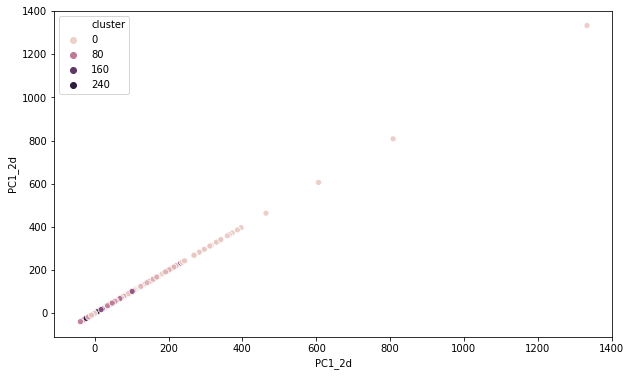

In [136]:
# import matplotlib.pyplot as plt
# plt.scatter(x,y, c=colors, s=50, cmap='viridis')
plt.figure(figsize=(10, 6))
sns.scatterplot(x = 'PC1_2d', y = 'PC1_2d', hue = 'cluster', data = plotX)
plt.show()


# plt.xlabel('Word', fontsize=55)
# plt.ylabel('Frequency', fontsize=55)
# sns.barplot(x = x[:50], y = y[:50])
# plt.tick_params(labelsize=40)
# plt.tight_layout()
# plt.savefig(outputPath + 'wordBarPlot.png')data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAncAAAF4CAYAAAA2dN8qAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOzde5xdZX3v8c9v32bPNZPL5DoJSUgMuQAhhHBRUUHkoiehSCmWVixUjlWPVo9VPPRVW3s8RbFeaFVKRQvKES1HDa1cNbZYlEACEUgCTG4kM7lMMpOZzHVff+ePvTJOkkkyyVz2zJrv+/Wa1+z1rGev/duLzexvnrWetczdEREREZFwiBS7ABEREREZPAp3IiIiIiGicCciIiISIgp3IiIiIiGicCciIiISIgp3IiIiIiEypOHOzL5jZo1m9kof6z5lZm5mk4JlM7O7zWyLmb1kZst69b3ZzOqCn5uHsmYRERGR0WyoR+7+Bbjq6EYzmwlcAezs1Xw1MD/4uQ34VtB3AvA54EJgBfA5Mxs/pFWLiIiIjFJDGu7c/WmguY9VXwU+DfS+gvIq4AEveBaoNrNpwJXAU+7e7O4HgafoIzCKiIiISBHOuTOzlUCDu//2qFUzgF29luuDtuO1i4iIiMhRYsP5YmZWBtwBvKuv1X20+Qna+9r+bRQO6VJeXn7+WWeddZqVioiIiAyf9evXH3D3msHY1rCGO+BMYA7wWzMDqAVeMLMVFEbkZvbqWwvsDtrfflT7f/S1cXe/F7gXYPny5b5u3brBrV5ERERkCJjZG4O1rWE9LOvuL7v7ZHef7e6zKQS3Ze6+F3gEeH8wa/YioNXd9wBPAO8ys/HBRIp3BW0iIiIicpShvhTKD4DfAAvMrN7Mbj1B90eBbcAW4J+BDwO4ezPwt8Dzwc/ngzYREREROYq593n62qinw7IiIiIyWpjZendfPhjbGu5z7ooqk8lQX19Pd3d3sUsZMZLJJLW1tcTj8WKXIiIiIoNgTIW7+vp6KisrmT17NsGEjjHN3WlqaqK+vp45c+YUuxwREREZBGPq3rLd3d1MnDhRwS5gZkycOFEjmSIiIiEypsIdoGB3FO0PERGRcBlz4W4k+uu//mu+/OUvn/LzWlpa+OY3vzkEFYmIiMhopXA3ip1OuHN38vn8EFUkIiIixaZwVwQPPPAA55xzDueeey5//Md/fMS6t7/97Ry+hMuBAweYPXs2ABs3bmTFihUsXbqUc845h7q6Om6//Xa2bt3K0qVL+Yu/+AsA7rrrLi644ALOOeccPve5zwGwY8cOFi5cyIc//GGWLVvGrl27EBERkRPL53LkMmlymTT5fK7Y5fTbmJotOxJs3LiRL3zhCzzzzDNMmjSJ5uZm7r777pM+75577uHjH/84N910E+l0mlwux5133skrr7zChg0bAHjyySepq6vjueeew91ZuXIlTz/9NLNmzeK1117ju9/9rg7jioiI9EM+m6F73166GveAGaWTp5KcPJVIbORfOkzhbpitWbOG66+/nkmTJgEwYcKEfj3v4osv5gtf+AL19fVcd911zJ8//5g+Tz75JE8++STnnXceAO3t7dTV1TFr1izOOOMMLrroosF7IyIiIiGW7eiga9/uwoI7XXt3E6uoIlE1rriF9YMOyw4zdz/hDNVYLNZzTlzvS5T84R/+IY888gilpaVceeWVrFmzps9tf/azn2XDhg1s2LCBLVu2cOuthTu+lZeXD/I7ERERCa90y7F3Ou2rbSRSuBtml19+OT/60Y9oamoCoLn5yA/K7NmzWb9+PQAPP/xwT/u2bduYO3cuH/vYx1i5ciUvvfQSlZWVtLW19fS58sor+c53vkN7ezsADQ0NNDY2DvVbEhERCZ14ZVUfbSN/1A50WHbYLV68mDvuuIO3ve1tRKNRzjvvvJ5JEwCf+tSnuOGGG/je977HZZdd1tP+wx/+kO9///vE43GmTp3KX/3VXzFhwgTe/OY3s2TJEq6++mruuusuNm/ezMUXXwxARUUF3//+94lGo8P9NkVEREa1eOU4EtUTekbrEuMnEq+oLHJV/WPuXuwahsTy5cv98KzTwzZv3szChQuLVNHIpf0iIiJyrHw2iwezZC0SJRIbujExM1vv7ssHY1sauRMRERHpQyHMjb6opHPuREREREJE4U5EREQkRBTuREREREJE4U5EREQkRBTuREREREJE4a4IHn/8cRYsWMC8efO48847i12OiIiIhIjC3TDL5XJ85CMf4bHHHmPTpk384Ac/YNOmTcUuS0REREJi9F28ZRilDjbRtbeBfCZNJJ6gdOoMSsZPHNA2n3vuOebNm8fcuXMBuPHGG1m9ejWLFi0ajJJFRERkjNPI3XGkDjbRUf8G+UwagHwmTUf9G6QONg1ouw0NDcycObNnuba2loaGhgFtU0REROQwhbvj6NrbAJ4/stHzhfYB6Ot2b2Y2oG2KiIiIHKZwdxyHR+z6295ftbW17Nq1q2e5vr6e6dOnD2ibIiIiIocp3B1HJJ44pfb+uuCCC6irq2P79u2k02keeughVq5cOaBtioiIiBymCRXHUTp1Bh31bxx5aNYilE6dMaDtxmIx/vEf/5Err7ySXC7HLbfcwuLFiwdYrYiIiEiBwt1xHJ4VO9izZQGuueYarrnmmgFvR0RERORoCncnUDJ+4qCEOREREZHhonPuREREREJE4U5EREQkRBTuREREREJE4U5EREQkRBTuREREREJkSMOdmX3HzBrN7JVebXeZ2atm9pKZ/cTMqnut+6yZbTGz18zsyl7tVwVtW8zs9qGseTh89atfZfHixSxZsoT3ve99dHd3s337di688ELmz5/PH/zBH5BOD+xOGCIiIjI2DfXI3b8AVx3V9hSwxN3PAV4HPgtgZouAG4HFwXO+aWZRM4sC3wCuBhYB7wv6jkoNDQ3cfffdrFu3jldeeYVcLsdDDz3EZz7zGT7xiU9QV1fH+PHjue+++4pdqoiIiIxCQxru3P1poPmotifdPRssPgvUBo9XAQ+5e8rdtwNbgBXBzxZ33+buaeChoO+Q27uhjmfuepA1d/wTz9z1IHs31A3KdrPZLF1dXWSzWTo7O5k2bRpr1qzh+uuvB+Dmm2/mpz/96aC8loiIiIwtxT7n7hbgseDxDGBXr3X1Qdvx2ofU3g11vPrTp0m1tAOQamnn1Z8+PeCAN2PGDD71qU8xa9Yspk2bxrhx4zj//POprq4mFitcU7q2tpaGhoYBvwcREREZe4oW7szsDiALPHi4qY9ufoL2vrZ5m5mtM7N1+/fvH1B9W596jnwme0RbPpNl61PPDWi7Bw8eZPXq1Wzfvp3du3fT0dHBY489dkw/s77etoiIiMiJFSXcmdnNwHuAm9z9cFCrB2b26lYL7D5B+zHc/V53X+7uy2tqagZU4+ERu/6299fPf/5z5syZQ01NDfF4nOuuu45f//rXtLS0kM0WwmR9fT3Tp08f0OuIiIjI2DTs4c7MrgI+A6x0985eqx4BbjSzEjObA8wHngOeB+ab2RwzS1CYdPHIUNdZUl1xSu39NWvWLJ599lk6Oztxd37xi1+waNEi3vGOd/Dwww8DcP/997Nq1bCcVigiIiIhM9SXQvkB8BtggZnVm9mtwD8ClcBTZrbBzO4BcPeNwI+ATcDjwEfcPRdMvvgo8ASwGfhR0HdInXnFCiLx2BFtkXiMM69YMaDtXnjhhVx//fUsW7aMs88+m3w+z2233cYXv/hFvvKVrzBv3jyampq49dZbB/Q6IiIiMjbZ746Khsvy5ct93bp1R7Rt3ryZhQsX9nsbezfUsfWp50i1tFNSXcGZV6xg6tL5g11q0Z3qfhEREZHBZWbr3X35YGwrdvIuY9fUpfNDGeZEREQkvIp9KRQRERERGUQKdyIiIiIhonAnIiIiEiIKdyIiIiIhonAnIiIiEiIKd8PslltuYfLkySxZsuSI9n/4h39gwYIFLF68mE9/+tM97X/3d3/HvHnzWLBgAU888cRwlysiIiKjjC6FMsw+8IEP8NGPfpT3v//9PW2//OUvWb16NS+99BIlJSU0NjYCsGnTJh566CE2btzI7t27eec738nrr79ONBotVvkiIiIywincncCvH1/Lw/espmlfMxOnTOD6D63ikqsuHNA2L730Unbs2HFE27e+9S1uv/12SkpKAJg8eTIAq1ev5sYbb6SkpIQ5c+Ywb948nnvuOS6++OIB1SAiIiLhpcOyx/Hrx9fy3TsfpGlvMzg07W3mu3c+yK8fXzvor/X666/zq1/9igsvvJC3ve1tPP/88wA0NDQwc+bMnn61tbU0NDQM+uuLiIhIeCjcHcfD96wm3Z0+oi3dnebhe1YP+mtls1kOHjzIs88+y1133cUNN9yAu9PXreHMbNBfX0RERMJD4e44mvY1n1L7QNTW1nLddddhZqxYsYJIJMKBAweora1l165dPf3q6+uZPn36oL++iIiIhIfC3XFMnDLhlNoH4tprr2XNmjVA4RBtOp1m0qRJrFy5koceeohUKsX27dupq6tjxYoVg/76IiIiEh4Kd8dx/YdWkUgmjmhLJBNc/6FVA9ru+973Pi6++GJee+01amtrue+++7jlllvYtm0bS5Ys4cYbb+T+++/HzFi8eDE33HADixYt4qqrruIb3/iGZsqKiIjICVlf53WFwfLly33dunVHtG3evJmFCxf2extDMVt2JDrV/SIiIiKDy8zWu/vywdiWLoVyApdcdWEow5yIiIiElw7LioiIiISIwp2IiIhIiCjciYiIiISIwp2IiIhIiCjciYiIiISIwt0w27VrF+94xztYuHAhixcv5utf//oR67/85S9jZhw4cAAAd+djH/sY8+bN45xzzuGFF14oRtkiIiIySuhSKMMsFovx93//9yxbtoy2tjbOP/98rrjiChYtWsSuXbt46qmnmDVrVk//xx57jLq6Ourq6li7di1/9md/xtq1a4v4DkRERGQk08jdCfzsp09x5SU3cO7st3PlJTfws58+NeBtTps2jWXLlgFQWVnJwoULaWhoAOATn/gEX/rSlzCznv6rV6/m/e9/P2bGRRddREtLC3v27BlwHSIiIhJOCnfH8bOfPsXf3H4Xexr24e7sadjH39x+16AEvMN27NjBiy++yIUXXsgjjzzCjBkzOPfcc4/o09DQwMyZM3uWa2tre8KgiIiIyNEU7o7j7i/9M91dqSPaurtS3P2lfx6U7be3t/Pe976Xr33ta8RiMb7whS/w+c9//ph+fd0ervfInoiIiEhvCnfHsXd34ym1n4pMJsN73/tebrrpJq677jq2bt3K9u3bOffcc5k9ezb19fUsW7aMvXv3Ultby65du3qeW19fz/Tp0wdcg4iIiISTwt1xTJ0++ZTa+8vdufXWW1m4cCGf/OQnATj77LNpbGxkx44d7Nixg9raWl544QWmTp3KypUreeCBB3B3nn32WcaNG8e0adMGVIOIiIiEl8LdcXzs0x8kWVpyRFuytISPffqDA9ruM888w/e+9z3WrFnD0qVLWbp0KY8++uhx+19zzTXMnTuXefPm8cEPfpBvfvObA3p9ERERCTddCuU43n3tFUDh3Lu9uxuZOn0yH/v0B3vaT9db3vKWPs+j623Hjh09j82Mb3zjGwN6TRERERk7FO5O4N3XXjHgMCciIiIynHRYVkRERCREFO5EREREQmTMhbuTne821mh/iIiIhMuYCnfJZJKmpiYFmoC709TURDKZLHYpIiIiMkiGdEKFmX0HeA/Q6O5LgrYJwA+B2cAO4AZ3P2iF2y58HbgG6AQ+4O4vBM+5GfjLYLP/293vP516amtrqa+vZ//+/af/pkImmUxSW1tb7DJERERkkAz1bNl/Af4ReKBX2+3AL9z9TjO7PVj+DHA1MD/4uRD4FnBhEAY/BywHHFhvZo+4+8FTLSYejzNnzpwBvB0RERGRkW1ID8u6+9NA81HNq4DDI2/3A9f2an/AC54Fqs1sGnAl8JS7NweB7ingqqGsW0RERGS0KsY5d1PcfQ9A8Pvw/bxmALt69asP2o7Xfgwzu83M1pnZOh16FRERkbFoJE2osD7a/ATtxza63+vuy919eU1NzaAWJyIiIjIaFCPc7QsOtxL8bgza64GZvfrVArtP0C4iIiIiRylGuHsEuDl4fDOwulf7+63gIqA1OGz7BPAuMxtvZuOBdwVtIiIiInKUob4Uyg+AtwOTzKyewqzXO4EfmdmtwE7g94Puj1K4DMoWCpdC+RMAd282s78Fng/6fd7dj56kISIiIiKAhfWCvsuXL/d169YVuwwRERGRkzKz9e6+fDC2NZImVIiIiIjIACnciYiIiISIwp2IiIhIiCjciYiIiISIwp2IiIhIiCjciYiIiISIwp2IiIhIiCjciYiIiISIwp2IiIhIiCjciYiIiISIwp2IiIhIiCjciYiIiISIwp2IiIhIiCjciYiIiISIwp2IiIhIiCjciYiIiISIwp2IiIhIiCjciYiIiISIwp2IiIhIiCjciYiIiISIwp2IiIhIiCjciYiIiISIwp2IiIhIiCjciYiIiISIwp2IiIhIiCjciYiIiISIwp2IiIhIiCjciYiIiISIwp2IiIhIiCjciYiIiISIwp2IiIhIiCjciYiIiISIwp2IiPQpn8+Rz+WKXYaInKJYsQsQEZGRxfN58uk0nXsb8FyW0snTiJaWEYnpK0NkNCjayJ2ZfcLMNprZK2b2AzNLmtkcM1trZnVm9kMzSwR9S4LlLcH62cWqW0Qk7PLZLC2vvky6+QCZ1hYO1W0m19VZ7LJEpJ+KEu7MbAbwMWC5uy8BosCNwBeBr7r7fOAgcGvwlFuBg+4+D/hq0E9ERIZApq0V8vkj2rr27dEhWpFRopjn3MWAUjOLAWXAHuAy4OFg/f3AtcHjVcEywfrLzcyGsVYRkTEjEj328KvFYqC/uiKjQlHCnbs3AF8GdlIIda3AeqDF3bNBt3pgRvB4BrAreG426D9xOGsWERkrYuXlRJPJ3zVEIpRNnUEkEi1eUSLSb0U5O9bMxlMYjZsDtAD/ClzdR1c//JQTrOu93duA2wBmzZo1KLWKiIw1kXiCqvmLyHa0k89liVeO02QKkVGkWIdl3wlsd/f97p4BfgxcAlQHh2kBaoHdweN6YCZAsH4c0Hz0Rt39Xndf7u7La2pqhvo9iIiEViQeJ1E9nuTEGqKJBBbRlbNERoti/d+6E7jIzMqCc+cuBzYBvwSuD/rcDKwOHj8SLBOsX+Pux4zciYiIiIx1xTrnbi2FiREvAC8HddwLfAb4pJltoXBO3X3BU+4DJgbtnwRuH/aiRUREREYBC+sA2PLly33dunXFLkNERETkpMxsvbsvH4xt6SQKERERkRBRuBMREREJEYU7ERERkRBRuBMREREJEYU7ERERkRBRuBMREREJEYU7ERERkRBRuBMREREJEYU7ERERkRBRuBMREREJEYU7ERERkRCJnayDmU040Xp3bx68ckRERERkIE4a7oD1gAMGzAIOBo+rgZ3AnCGrTkREREROyUkPy7r7HHefCzwB/Dd3n+TuE4H3AD8e6gJFREREpP9O5Zy7C9z90cML7v4Y8LbBL0lERERETld/DssedsDM/hL4PoXDtH8ENA1JVSIiIiJyWk5l5O59QA3wk+CnJmgTERERkRGi3yN3wazYjw9hLSIiIiIyQCcduTOzqJn9dzP7WzO75Kh1fzl0pYmIiIjIqerPYdl/ojBxogn4BzP7Sq911w1JVSIiIiJyWvoT7la4+x+6+9eAC4EKM/uxmZVQuN6diIiIiIwQ/Ql3icMP3D3r7rcBG4A1QMVQFSYiIiIip64/4W6dmV3Vu8HdPw98F5g9FEWJiIiIyOnpzx0q/sjdH++j/dvuHj+8bGZXDHZxIiIiInJqTuU6dyfzxUHcloiIiIichsEMd5pcISIiIlJkgxnufBC3JSIiIiKnYTDDnYiIiIgU2WCGux2DuC0REREROQ0DCne9Z8i6u+5WISIiIlJkAx25u29QqhARERGRQRE7WQcze+R4q4CJg1uOiIiIiAzEScMd8Fbgj4D2o9oNWDHoFYmIiIjIaetPuHsW6HT3/zx6hZm9NvgliYgMDXfHsxk8n8ciESwawyK6aICIhMtJw527X32CdZee7gubWTXwbWAJhWvk3QK8BvyQwj1rdwA3uPtBMzPg68A1QCfwAXd/4XRfW0TGplx3F21bXiOfSWOxGJVz5hMrr1DAE5FQOelfNDObZ2Zv7qP9rWZ25gBe++vA4+5+FnAusBm4HfiFu88HfhEsA1wNzA9+bgO+NYDXFZExKJ/J0L69jnwmDYBns7Rtq8Oz2SJXJiIyuPrzz9WvAW19tHcF606ZmVUBlxLMtnX3tLu3AKuA+4Nu9wPXBo9XAQ94wbNAtZlNO53XFpGxyd3JdXcf2ZbL4p4vUkUiIkOjP+Futru/dHSju6+jcPj0dMwF9gPfNbMXzezbZlYOTHH3PcH29wCTg/4zgF29nl8ftImI9IuZES0tO7ItFtchWREJnf78VUueYF3pab5uDFgGfMvdzwM6+N0h2L5YH23H3MvWzG4zs3Vmtm7//v2nWZqIhFEkHqdyzvyegBdJlFA1bwEWixe5MhGRwdWfcPe8mX3w6EYzuxVYf5qvWw/Uu/vaYPlhCmFv3+HDrcHvxl79Z/Z6fi2w++iNuvu97r7c3ZfX1NScZmkiElbRZJKqeWdRvWQp4xYsIlpaRmG+lohIePTnUih/DvzEzG7id2FuOZAAfu90XtTd95rZLjNb4O6vAZcDm4Kfm4E7g9+rg6c8AnzUzB4CLgRaDx++FRE5FZG4RupEJNz6cymUfcAlZvYOCpctAfiZu68Z4Gv/D+BBM0sA24A/oTCS+KNgVHAn8PtB30cpXAZlC4VLofzJAF9bREREJJT6c/uxJPAhYB7wMnCfuw/42gHuvoHCCODRLu+jrwMfGehrioiIiIRdf865u59CCHuZwvXmvjykFYmIiIjIaevPOXeL3P1sADO7D3huaEsSERERkdPVn5G7zOEHg3E4VkRERESGTn9G7s41s0PBYwNKg2WjcDpc1ZBVJyIiIiKnpD+zZaPDUYiIiIiIDJzuuyMiIiISIgp3IiIiIiGicCciIiISIgp3IiIiIiGicCciIiISIgp3IiIiIiGicCciIiISIgp3IiIiIiGicCciIiISIgp3IiIiIiGicCciIiISIgp3IiIiIiGicCciIiISIgp3IiIiIiGicCciIiISIgp3IiIiIiESK3YBIjJy5TNpct1dYEa0pJRIPF7skkRE5CQU7kSkT/l0mtbXNpLPpAGIJpNUzV9IJJ4ocmUiInIiOiwrIsdwd7oPNPYEO4BcdzfpQ61FrEpERPpD4U5E+uDk0qljWvOpY9tERGRkUbgTkWOYRUjWTDmmvWTCxCJUIyIip0Ln3IlIn6IlSSrPXEDX3gawCGXTazGdbyciMuIp3IlInyKxGIlx1cTKywEjEtOfCxGR0UB/rUXkhCIxXf5ERGQ00Tl3IiIiIiGicCciIiISIgp3IiIiIiGicCciIiISIgp3IiIiIiFS1HBnZlEze9HM/j1YnmNma82szsx+aGaJoL0kWN4SrJ9dzLpFRERERqpij9x9HNjca/mLwFfdfT5wELg1aL8VOOju84CvBv1Exrx8JkM+k8Hdi12KiIiMEEULd2ZWC7wb+HawbMBlwMNBl/uBa4PHq4JlgvWXB/1FxqR8Lkem/RBtW1+j9fVNpPY3ks9mil2WiIiMAMUcufsa8GkgHyxPBFrcPRss1wMzgsczgF0AwfrWoL/ImOLu5HM5PJfl0OubyXZ2kE9101G/g8yhQ8UuT0RERoCihDszew/Q6O7rezf30dX7sa73dm8zs3Vmtm7//v2DUKnIyJHPZOjat4f2HVvJHGqlYs586DWAnWraTz6bPcEWRERkLCjW7cfeDKw0s2uAJFBFYSSv2sxiwehcLbA76F8PzATqzSwGjAOaj96ou98L3AuwfPlynYQkoZHPZGjb+hrZzg4AMq0HSU6eSsnEGlIHGgGIJJNYpNin0YqISLEV5ZvA3T/r7rXuPhu4EVjj7jcBvwSuD7rdDKwOHj8SLBOsX+M6g1xCzvN58rlc8DjXE+wO6z7QSKJ6PACReILSKdMV7kREpGgjd8fzGeAhM/vfwIvAfUH7fcD3zGwLhRG7G4tUn8iwyKXTdDfuJdfdScnEycTKyo/pY5Eo0ZIk4xYsJpJIEIknilCpiIiMNEUPd+7+H8B/BI+3ASv66NMN/P6wFiZSBIXLmuRJH2wm1bQfz2XJHGql6k2LSIyfSPpgU0/fshkziSQSWEmyiBWLiMhIU/RwJyKQz2bJZ9J0H9hP6kAjiapxVJ75Jtq2vobncrS/sZ2q+WdRMqmGXGcH8apqIvEEZjoMKyIiR1K4EykidyefTtO5exe57i4S46qpnDuftm2vQyRCyaQpdO/bjUUMMyNROQ4qxxW7bBERGcH0z36RIvJshkOvbyJ9sIlcVydde3eTOdRKycQaModaiZcXzrUrnzGLSDxe5GpFRGQ0ULgTKaLDh2N7Sx08QLxyHNHSUiwWp3rRuUTLK4pUoYiIjDY6LCsyTPLZLJ7PAUYkFsMiESwSPaZfJJ7A8zkqZs0hmiwd/kJFRGRUU7gTGWLuTj6TpmPXG6QO7MeiMSpmzyFRPQGLRimZVEPqQHBHFTPKa88ojNpF9b+niIicOn17iAyhfDZDPpcj1biP1P7CnSQ8m6Fty+uMP/d8YqWllE2bSbJmKvlUimhZec+onoiIyOlQuBMZAvlMhlw6RabtEImqatKtLcf0ybYfIlZaSiQeL0yWKC0rQqUiIhI2CncigyyfzdK1dzedDbsAyNVMIVZRQba97Yh+sTJNkhARkcGnYz8ig8zzOTp31/csdzftJzlpMrFeM15Lp80gktDtwkREZPBp5E5kgA6fV0c+TyQWA/fCT0+HPIdef5Vxi5bguRyRaAyiEV23TkREhoRG7kROUz6XI9vZSWdDPenmJjyToW3r64ARrzryLhLxykoMiCZKiCaTROH6dToAABnrSURBVOMatRMRkaGhkTuR05TraKdl08s9y9HSMirOmEOq9SCV8xbQvW9PYUJF9XiSNZOJKNCJiMgwULgTOQ35TIaOXW8c0Zbr6sTzeXKdHURqplA2Yyaez2PRKGZWpEpFRGSsUbgT6Yd8JlM4ty6TKdw1wgoXJz6ae56SiTWFMGem69WJiMiwU7gTOYl8tjBK1924FwCLRKk+ZyllM2Zy6LVNPf0iiRJipeVEEpooISIixaNwJ3IS+Wy2J9hB4VIn7VvrqJx/FtWLz6Fr316iJUmSk6cQSSR0CFZERIpK4U7kKIfvLpFPpYhVVOC5/DF9cukUAPHKqsL168wU6kREZERQuBPpJZ/J0LatjvTB5kKDRahefA6x8gqyHe09/ZITawrXtAOdVyciIiOKvpVkzHN38ul04Seb/V2wA/A8HTu3Uzl/AfFx1USTScpqZ1I6bYZCnYiIjEgauZMxLZdKFQ6x5nJghnue0um1dPW6fVg+kyYSiVI1/yzI57FYTMFORERGLIU7GZMOj9a1vrqRXFcnULgIceXceSTGVdO9fx+eyQCQnDwVi8d1Tp2IiIwKCncyJuWzWVLNB3qCHRQuQpw51IrF45ROm0G66QDJyVMomTBJwU5EREYNhTsZk8ydXHfXMe25VIqSqnGUlJVRWjOlcAhWwU5EREYRnTgkY5LjlIyfeEx7yYSJxJJJItEYER2KFRGRUUgjdxJans/juSxEokSi0SPWRWJxPB6n8sz5dO7ZDUDZjJlEy8qIxBPFKFdERGRQKNxJ6Hg+Tz6bpWtPPenWVuIVlZTVziSaKOnpY5EI0dJSLJFgXGUVmBGJJzQLVkRERj2FOwmVXCqFZ7N01L/Rc726XGcH2c52xi1YTCT+u/u+WiRKNBIF3QpWRERCRMMUEgpdhzroPtTOobpXyeeOuhAxkG1vx3O5IlUnIiIyfBTuZNTLpdPs276XrtY2su1tkM9hsaMGpc0goskRIiISfgp3Miq5O9nOLrKdnXS3d7H20ed6Rua6GvdRPvOMI/qXzzwDi+osBBERCT9928mok0tnyHV30fzbl8h1p6g4ayGdhzrJWRSLxUg3NxEtSVK9+BxyqW5i5RVEYvFjZsyKiIiEkUbuZNTI53Jk2jto27qVrt17GH/2EmKlpXRt28plN13GT+9eTWzGmcQnTCLb0U62u5t4VTWx0rIjJlKIiIiEmUbuZMRzd/KpFPlMhr2/egbyeQDad+5i0gXLafz1b6iYnGXVx36PF36+gTPPO5Ops2dRUlFW5MpFRESGX1FG7sxsppn90sw2m9lGM/t40D7BzJ4ys7rg9/ig3czsbjPbYmYvmdmyYtQtwy+XSpE51Ebn3kYObd3WE+wA8uk0qeZmEuOrobuDCZOreNsNlzJz4RkKdiIiMmYV67BsFvif7r4QuAj4iJktAm4HfuHu84FfBMsAVwPzg5/bgG8Nf8kynLLpNOnWVpo3vMTBl18hEotSNmP6sR3diSZKqHrTfGKlpURLSnRunYiIjGlFCXfuvsfdXwgetwGbgRnAKuD+oNv9wLXB41XAA17wLFBtZtOGuWwZBvlcjmxXF+RyNP5mLd3795NuaaF5w2/xTJbE+PE9fSPxOGXTp1G9eCGxMo3UiYiIwAg4587MZgPnAWuBKe6+BwoB0MwmB91mALt6Pa0+aNszfJXKUMt2d9O1Zy9d+/aRGFdFzYUX0LT+RXLd3QC079zJhHOW0L5zF5F4jPLaWqykhKhG6kRERHoUNdyZWQXw/4A/d/dDZse9yGxfK7yP7d1G4bAts2bNGqwyZYjl83nymQyHXt9Cx86dAKQONNF9oJlxCxfQ/OJvAYgmk3Q17qdq/jyiiUQxSxYRERmxinYpFDOLUwh2D7r7j4PmfYcPtwa/G4P2emBmr6fXAruP3qa73+vuy919eU1NzdAVL4Mil8mQS3XTtXsX+XSazvr6I9ZnWluJlZYChUOwVfPnUTZ9uoKdiIjICRRrtqwB9wGb3f0rvVY9AtwcPL4ZWN2r/f3BrNmLgNbDh29l9Mnnc2S7uyGfo/X1jaSaGvFM+thbhgGRRAkTzz+PKZe+hVhZGbHSZBEqFhERGT2KNXL3ZuCPgcvMbEPwcw1wJ3CFmdUBVwTLAI8C24AtwD8DHy5CzTIIcpkM+VQGA1IHm3oubZJubWbcWW86om/5GbOwaITk5MnESks5wWF7ERERCRTlnDt3/y/6Po8O4PI++jvwkSEtSoZUpqsLT2do39VAvKKM0ilTjrjXa+ZQCyWTpjDlrW8m1dRMYtw4ouVlxJIaqRMRETkVRZ8tK+GWzWTAnUzrIRp/81xPe2LcOCZffAHdsRiezQKQat5PctJkymbWEtXtwkRERE6Lwp0MmWxXF6mDLUSTJbRsfu2IdenWVnLdKarOPIv0oRZwJzF+IhaN6SLEIiIiA6BwJ4Mu29mFu7N/7fOkWw8x4dyz8fwxV67BczmymSyJ6olYJEKkjwkVIiIicmqKdikUCZ9sKk2ms5NcJkOmvZ106yEAOnfvoWru7CP6xsrLiJWVEY3FiCYSCnYiIiKDRN+oMmC5XA5Pp8l1pzi4+TVyXV1U9gpz3fsPUDq5hskXr6Cjfjex8jIqZ8/C4nGiCnUiIiKDSt+sMiDZri7SLa20vvY6uFM570xyXd2UjBuH9ZoscXDjZmouXsGEc5eAQzShCRMiIiJDQeFOTku2qxtwsh2dHHh+fU9784u/peaiFbRu3caUN19E2/Yd5FNpKufOJlFVpVmwIiIiQ0zhTk5JLpPB83mynR1kWlvJdnQd06ezYTeRaJT2N3ZRdeZcoiUJosmkLkIsIiIyDBTupN+yXV14NotFo0RicVItLSSqq4/pF6+sJJ/LUTGzFqIRYiUlRahWRERkbFK4k5PK5bJ4OsOBdevIdXYCUDp9OuUzZ2KRKPFxVWSCmbGxigrKZkwDM91dQkREpAgU7uS4st3dkM+Tz+Xo2LmzJ9gBdO3eTfnMmbTv2EH1WW/CIlEsGiVamiRWWlrEqkVERMY2hTs5RjabhWwW3LFoFAOy7e3H9Mu0tVFWW0u0pIRILFYId4nE8BcsIiIiPRTu5Ag9o3WZDKnmJuIVFUQrKiidOpV0S8sRfUsmTMAsovPqRERERhCFOwGg81AHuXSWbHcKy2fINu2hfPoM0q0tJONxSqdMIdfdTWdDA5F4nKoFC7BIRIdgRURERhiFuzEu050m051mw8/WsuHfn8PdmThrMtd88lratr1K9eJzSO3fR1ntLBITJlA+a1bhifE4Md1dQkREZMTRvWXHsGx3NxHydLa08+K/rcXdAWja2ciLjz5PfPwk8ukUkWQpmBEvL4dolFhpqYKdiIjICKVv6DEo09UFuRyH6l4Fh+aOYydB7N+2D790AdGSJPGKStyMWFlZEaoVERGRU6FwN4ZkurshmyeXTtG25VXy6TREItTMngkG+O/6zl52JmWTxhNJxImW6Hp1IiIio4UOy44BmUyGbGcnufYO8tkM0Xgcz+UKK/N5vKOFK//HSsrGVxCJRlj4jnNZdNl5RMvKFexERERGGY3chVymsxPyTue+Rppf2gj5PKXTplA1bz6HXn+10OfAXiZNnsrv/+3NEDGi8SilleVFrlxEREROh0buQirV2UVXSxup1g4ObdtBrqubGVe8HYtG6dqzDyxKNLg9mMXilE+bTqIiScWEKgU7ERGRUUwjdyGTSaXJpzNs+fl6dj27iUgsyrwrzqd6cgWHtr3B+LMX0rzhFbLtHVTOOwuLGNFEgnwkQkJ3lxARERn1NHIXIumOLjyTpbV+P2/818vkszmy3Wle/bffQEkZ3Y2NlEyYAGYkJ00kEosTKSkhmkwSV7ATEREJBYW7EEi3d5JqbSPb0UnX/maiOIt/761H9GnaupvkxIm4O1MvvQSPRIhXlOm2YSIiIiGjw7KjWDadgXyept9u4uDmrQAkayYwecVS8vkcVbU1HKrfD0B1bQ0V0ycQSZYQiceJRqPFLF1ERESGiMLdKJROp8l1pjm4vYFU8yEmzKsFi3BwUx3d+5vp2LmbnBs1C2ZxqGE/My9cRGXtZCLxGPGkRupERETCTOFulEl1dJJNZdn80FO072kC4I3/fJHFf/BOSidPpKuxiVRLKxWzZzFh0ZnMungxkXiEkgrNgBURERkLFO5GiXRnN7nuNKnOLlJdqZ5gB4DDzl/9ljMuWURXYxPlM6ZQMWMyFo8RL9FECRERkbFE4W6ES6fSeCrD7rWvcHBrPVUzpzLp7DOP6ZfP5bBolAlnL6BqzkyIKdiJiIiMRQp3I1i6vYN8JsfO/3iB/a8UJkx07W+hZvFcSidU0dV8qKfvrEvPo2rudLCIzqsTEREZwxTuRqBMKgXu5FNpctk8BzZtO2L91kef4ZwPvJudazeSa+tkynlvonRSNfHS0iJVLCIiIiOFwt0Ikurspqu9i872LrbX7WJa7SSmTptEvKKM9KGOnn5dzYfwbJapFywkEo1QWlFKLKb/lCIiIqJwNyJkM1lS7V1sfmYjT//fX5JJZVh06dlUjaugMXaQM6+5hM0//Dm4AzDzrUuJJuLEEjESpckiVy8iIiIjicJdkTXvP0g6lcbSOZ7658d62l9Zs4HxMyby0rpNrPqDy1n6wVWkWttJjh9HNBmnpFKXNhEREZFjjapwZ2ZXAV8HosC33f3OIpd02tpa22htaeOrf/dPlJYmueqSS47ps3vTTqYvPQOPGLm2dipqJ5Mo03l1IiIicnyj5t6yZhYFvgFcDSwC3mdmi4pb1anLZtLkUt0ko0ZZMs6Ss9/Ei8+/TOXU6mP6Tpo9hbOWzidZlqS0dqqCnYiIiJzUaBq5WwFscfdtAGb2ELAK2FTUqk5BJp2BdIqWzRvxXBaA33v3Jbg7e5uaOPddy3jp5y/ieWfW2bM5/5oVJJIxzYIVERGRfhtN4W4GsKvXcj1wYZFqOSXpzi7Mc2QOtRErK6V0+gw6d70BQGZvA+9edRkr33kL//N/fYgP3fNxDIiVxCmvrihu4SIiIjLqjKZwZ320+REdzG4DbgOYNWvWcNR0QqmuFJ7LkWtpom1LXU97+RmzSU6ZRve+PQDEohESiQSz5tQSLYlRWl5KLD6a/tOIiIjISDFqzrmjMFI3s9dyLbC7dwd3v9fdl7v78pqammEtrrdsNkuqrYOW17dBqpv27UdehLhj105KJkwEwKIxyior+NfHv83ic99EZXWlgp2IiIicttEU7p4H5pvZHDNLADcCjxS5pmM0HzhI+8E29q97mf2/fhHP5/Fc7shO+TyYEauoZNyiJeSJMHXGZCrHVRWnaBEREQmNURPu3D0LfBR4AtgM/MjdNxa3qt9Jd3TS1NjEF+74Gk2NB2h5fTsAHXsOkAhG6Q5LVI8nkkhQNW8B8fIKyivLilGyiIiIhNCoCXcA7v6ou7/J3c909y8Uux6AdDpNx8E2mja/wZaNW/jlk/9FNpsjEo0CsH/dK5ROnUHpjJnEq6ooq51J1VkLyUeiRJO6u4SIiIgMrlEV7kaajoOHSLd1kU+nad2xh21bdwLw04efoGLhPAByqTTbfvJzshmoWLCIsllnEEsmSSQSxSxdREREQkpn7p+GdGc32c5utqx+mrbd+6maNZXZl19AWVcXX/4//8SPHvw3zlp0Jue/bQXRji4qptUQq6ygpFyHX0VERGRoaeTuNOTTGTb94EkO7dqH5/K0bt/N1kefoSIa4++/8Tlmz53JN7/+PX619mUqFswhOWUipeN0zToREREZehq5O0W5XI5sKkNXU+sR7e27DxCNRZl0oI2vfu0OSieOo3JcBUndMkxERESGkcLdKXJ3zIxYaQnZrlRPe6KqnEhpCXPf/RZiiRiJCh2CFRERkeGnw7KnKBqJEksmmPeetxIJLjYcLYnzpmvfRj4SoWxClYKdiIiIFI1G7k6RRYxISYzKmTUs+7PryGVyxJIJosk48ZKSYpcnIiIiY5zC3WmIl5QQLykhn81hEcMiGgAVERGRkUHhbgAisWixSxARERE5goacREREREJE4U5EREQkRBTuREREREJE4U5EREQkRBTuREREREJE4U5EREQkRBTuREREREJE4U5EREQkRBTuREREREJE4U5EREQkRMzdi13DkDCz/cAbxa7jJCYBB4pdxCig/XRy2kf9o/3UP9pP/aP91D/aT/2zwN0rB2NDob23rLvXFLuGkzGzde6+vNh1jHTaTyenfdQ/2k/9o/3UP9pP/aP91D9mtm6wtqXDsiIiIiIhonAnIiIiEiIKd8V1b7ELGCW0n05O+6h/tJ/6R/upf7Sf+kf7qX8GbT+FdkKFiIiIyFikkTsRERGREFG4KwIzu8rMXjOzLWZ2e7HrKSYzm2lmvzSzzWa20cw+HrRPMLOnzKwu+D0+aDczuzvYdy+Z2bLivoPhY2ZRM3vRzP49WJ5jZmuDffRDM0sE7SXB8pZg/exi1j3czKzazB42s1eDz9XF+jwdycw+Efz/9oqZ/cDMkvo8gZl9x8wazeyVXm2n/Nkxs5uD/nVmdnMx3stQOs5+uiv4f+4lM/uJmVX3WvfZYD+9ZmZX9moP9XdhX/up17pPmZmb2aRgeXA/T+6un2H8AaLAVmAukAB+Cywqdl1F3B/TgGXB40rgdWAR8CXg9qD9duCLweNrgMcAAy4C1hb7PQzjvvok8H+Bfw+WfwTcGDy+B/iz4PGHgXuCxzcCPyx27cO8n+4H/jR4nACq9Xk6Yv/MALYDpb0+Rx/Q58kBLgWWAa/0ajulzw4wAdgW/B4fPB5f7Pc2DPvpXUAsePzFXvtpUfA9VwLMCb7/omPhu7Cv/RS0zwSeoHAt3klD8XnSyN3wWwFscfdt7p4GHgJWFbmmonH3Pe7+QvC4DdhM4ctnFYUvaYLf1waPVwEPeMGzQLWZTRvmsoedmdUC7wa+HSwbcBnwcNDl6H10eN89DFwe9A89M6ui8Af1PgB3T7t7C/o8HS0GlJpZDCgD9qDPE+7+NNB8VPOpfnauBJ5y92Z3Pwg8BVw19NUPn772k7s/6e7ZYPFZoDZ4vAp4yN1T7r4d2ELhezD034XH+TwBfBX4NNB70sOgfp4U7obfDGBXr+X6oG3MCw73nAesBaa4+x4oBEBgctBtrO6/r1H4Y5APlicCLb3+mPbeDz37KFjfGvQfC+YC+4HvBoewv21m5ejz1MPdG4AvAzsphLpWYD36PB3PqX52xtxnqg+3UBiFAu2nI5jZSqDB3X971KpB3U8Kd8Ovr3/xjvkpy2ZWAfw/4M/d/dCJuvbRFur9Z2bvARrdfX3v5j66ej/WhV2MwmGQb7n7eUAHhUNpxzPm9lVwztgqCofIpgPlwNV9dNXn6cSOt1/G9P4yszuALPDg4aY+uo3J/WRmZcAdwF/1tbqPttPeTwp3w6+ewvH2w2qB3UWqZUQwsziFYPegu/84aN53+PBY8LsxaB+L++/NwEoz20Hh0MVlFEbyqoPDanDkfujZR8H6cfR9aCCM6oF6d18bLD9MIezp8/Q77wS2u/t+d88APwYuQZ+n4znVz85Y/EwBhRP/gfcAN3lwwhjaT72dSeEfVb8N/p7XAi+Y2VQGeT8p3A2/54H5wcy0BIUTlB8pck1FE5y7cx+w2d2/0mvVI8DhWUE3A6t7tb8/mFl0EdB6+JBJWLn7Z9291t1nU/i8rHH3m4BfAtcH3Y7eR4f33fVB/1D/i/gwd98L7DKzBUHT5cAm9HnqbSdwkZmVBf//Hd5H+jz17VQ/O08A7zKz8cEo6buCtlAzs6uAzwAr3b2z16pHgBuDWddzgPnAc4zB70J3f9ndJ7v77ODveT2FCYV7GezPU7Fnk4zFHwqzYl6nMFPojmLXU+R98RYKQ8wvARuCn2sonNPzC6Au+D0h6G/AN4J99zKwvNjvYZj319v53WzZuRT+SG4B/hUoCdqTwfKWYP3cYtc9zPtoKbAu+Ez9lMIMM32ejtxHfwO8CrwCfI/CTMYx/3kCfkDhPMRM8MV76+l8diicc7Yl+PmTYr+vYdpPWyicG3b47/g9vfrfEeyn14Cre7WH+ruwr/101Pod/G627KB+nnSHChEREZEQ0WFZERERkRBRuBMREREJEYU7ERERkRBRuBMREREJEYU7ERERkRBRuBMREREJEYU7ERkzzCxnZhvM7BUz+9fgdkCY2VQze8jMtprZJjN71MzeFKx73MxazOzf+7H9B83stWD73wnuvtJXvx1mNmlw352ISIHCnYiMJV3uvtTdlwBp4EPBXRp+AvyHu5/p7ouA/wVMCZ5zF/DH/dz+g8BZwNlAKfCng1q9iEg/xE7eRUQklH4FnAO8A8i4+z2HV7j7hl6Pf2Fmb+/PBt390cOPzew5CveBxMwmUrhafQ2Fuzz0dTNwEZFBoZE7ERlzzCwGXE3hNj9LgPWDvP04hdG+x4OmzwH/5e7nUbiH5KzBfD0Rkd4U7kRkLCk1sw0U7j27E7hviF7nm8DT7v6rYPlS4PsA7v4z4OAQva6IiA7LisiY0uXuS3s3mNlG4PrBegEz+xyFw6///ahVupG3iAwLjdyJyFi3Bigxsw8ebjCzC8zsbae6ITP7U+BK4H3unu+16mngpqDP1cD4gZUsInJ85q5/TIrI2GBm7e5e0Uf7dOBrwPlAN7AD+HN3rzOzX1GYAVsBNAG3uvsTx9l+FngDaAuafuzun+81oWIS8J/AdcD57n5gMN+fiAgo3ImIiIiEig7LioiIiISIJlSIiJwiM/sJMOeo5s8c73CtiMhw0mFZERERkRDRYVkREfn/7daBDAAAAMAgf+t7fEURMCJ3AAAjcgcAMCJ3AAAjcgcAMBKtAuqK2HZb5QAAAABJRU5ErkJggg==

In [127]:
x1=plotX[['PC1_3d']].to_numpy()
y1=plotX[['PC2_3d']].to_numpy()
z1=plotX[['PC3_3d']].to_numpy()
# colors = plotX[['cluster']].to_numpy()


In [128]:
import matplotlib.pyplot as plt
plt.scatter(x1,y1,z1, c=colors, s=50, cmap='viridis')


TypeError: scatter() got multiple values for argument 's'

In [24]:
# set max display col
# pd.set_option('display.max_colwidth', -1)
# pd.reset_option('display.max_colwidth')
user_friends = pd.read_csv(dataPath + "user_friends.csv")
def friend_count(row):
    if (type(row['friends']) != str):
        return 0
    else:
        return  len(row['friends'].split())

user_friends['count'] = user_friends.apply(lambda row: friend_count(row), axis=1)
user_friends.head()


user                                            friends  count
0  3197468391  1346449342 3873244116 4226080662 1222907620 54...   3623
1  3537982273  1491560444 395798035 2036380346 899375619 3534...   1467
2   823183725  1484954627 1950387873 1652977611 4185960823 42...     96
3  1872223848  83361640 723814682 557944478 1724049724 253059...     13
4  3429017717  4253303705 2130310957 1838389374 3928735761 71...   1136

In [140]:
user_friends["count"].describe()

count    38202.000000
mean       795.413931
std        922.118197
min          0.000000
25%        174.000000
50%        481.000000
75%       1058.750000
max       4964.000000
Name: count, dtype: float64

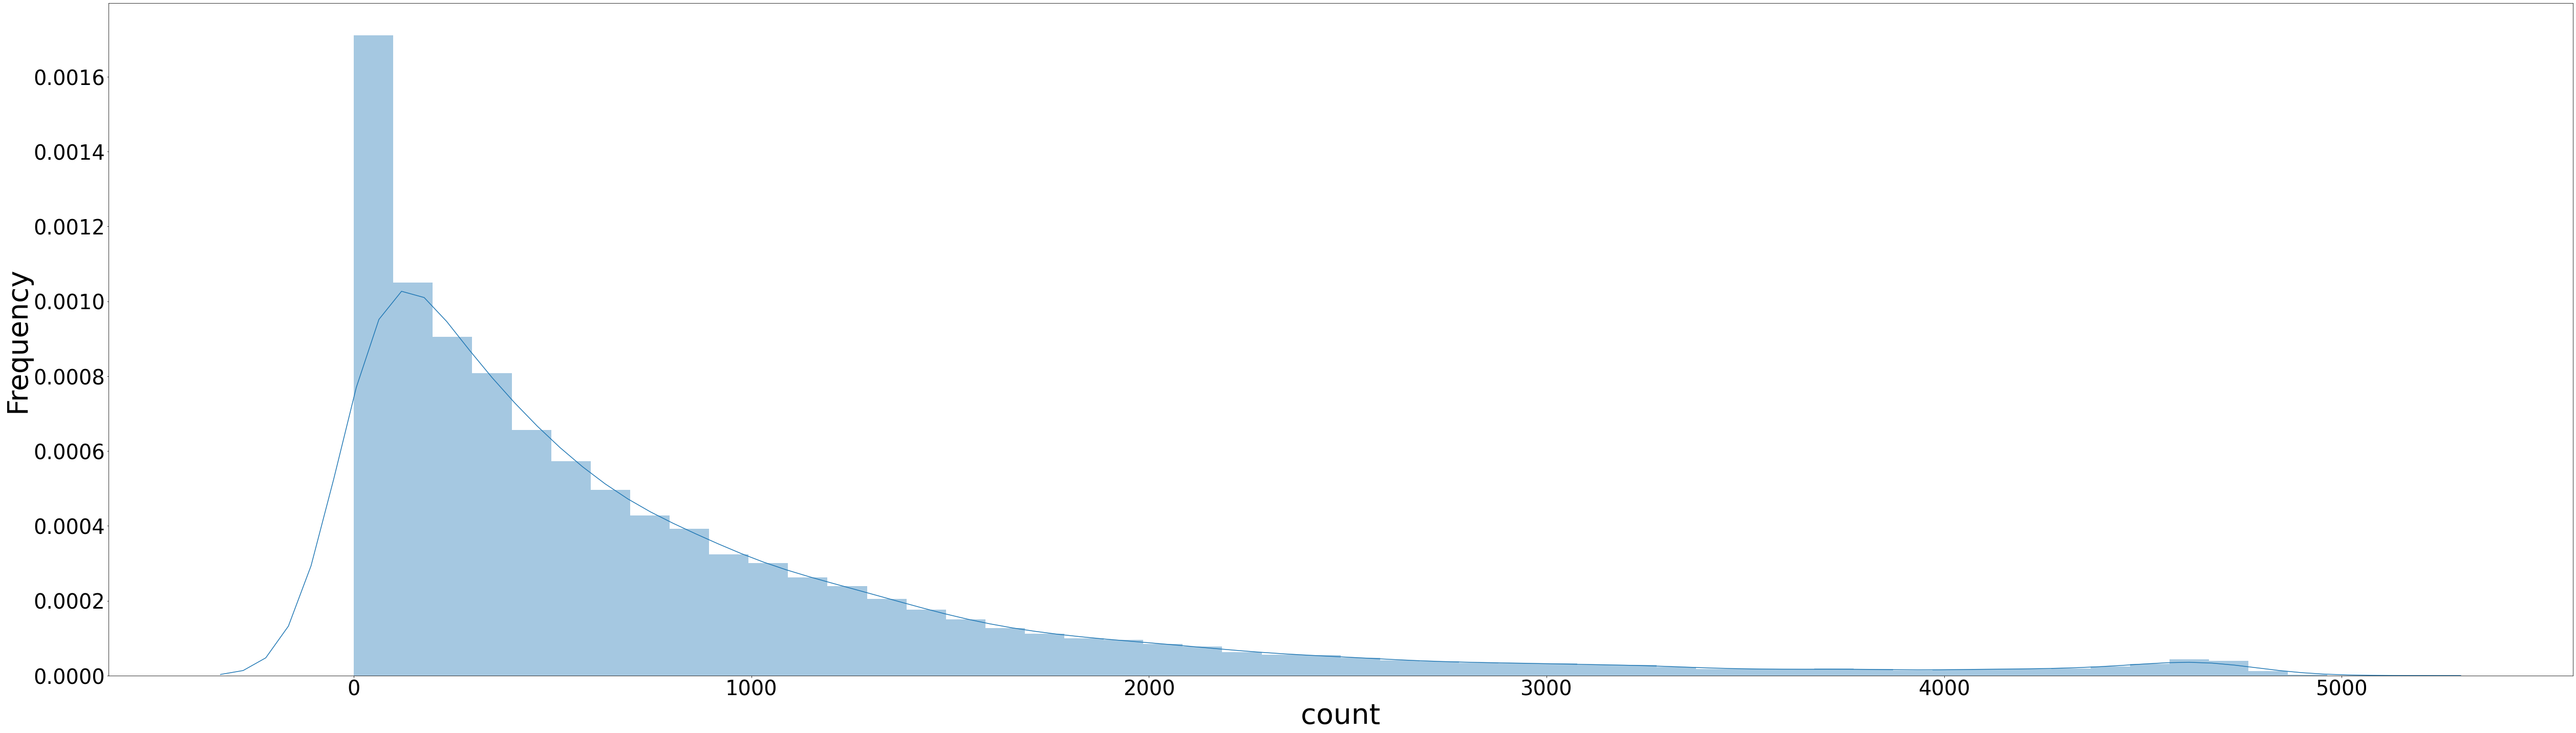

In [163]:
import matplotlib.pyplot
matplotlib.pyplot.figure(figsize=(70, 20))
matplotlib.pyplot.xlabel('Range of number of friends', fontsize=55)
matplotlib.pyplot.ylabel('Frequency', fontsize=55)
sns.distplot(user_friends['count'] , 50)
# plt.show()
matplotlib.pyplot.tick_params(labelsize=40)
matplotlib.pyplot.tight_layout()

  Number of friends  Frequency   Density
0          (0, 250]      12210  0.319617
1        (250, 500]       7216  0.188891
2        (500, 750]       4892  0.128056
3       (750, 1000]       3508  0.091828
4      (1000, 1250]       2583  0.067614


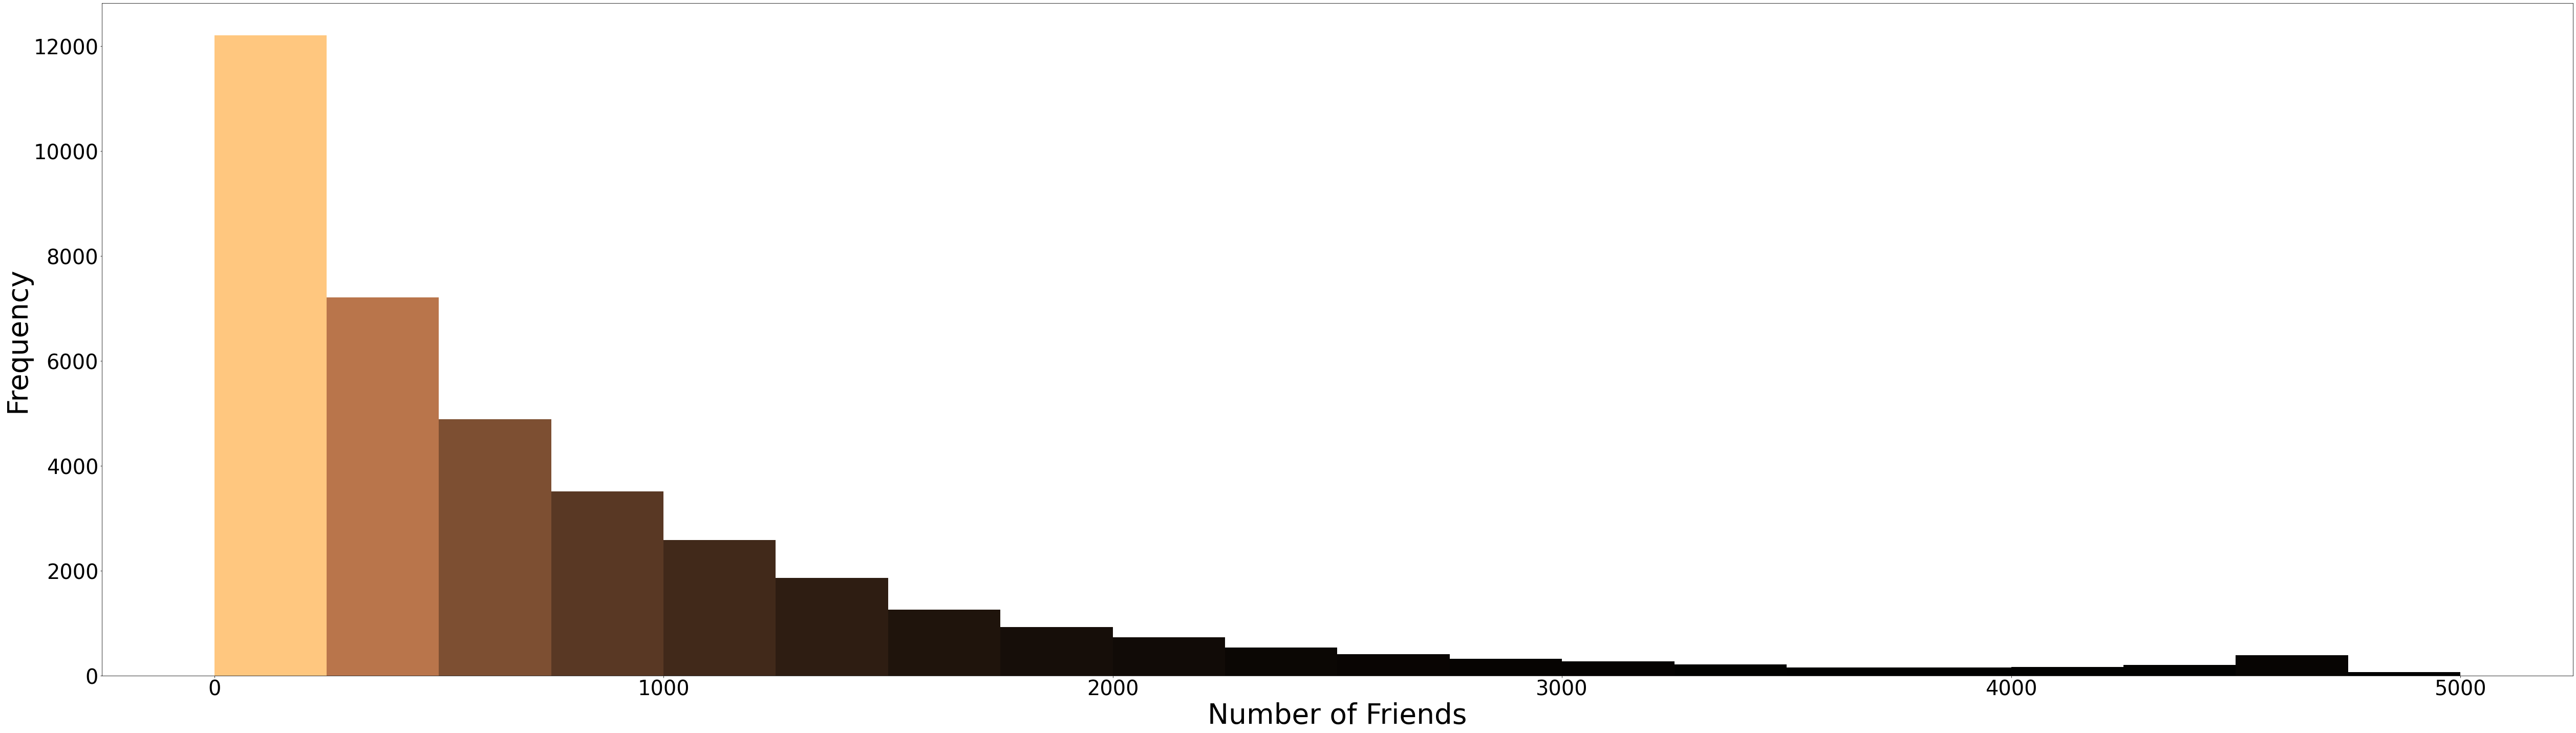

In [166]:
bins = np.arange(0,5250,250)
cut = pd.cut(user_friends["count"].array, bins) 
groups = user_friends.groupby([pd.cut(user_friends["count"].array, bins) ])
df2 = groups.size().to_frame()
df2.reset_index(inplace = True)
df2.columns = ["Number of friends", "Frequency"]

sum = len(user_friends.index)
df2["Density"] = df2["Frequency"] / sum
print(df2.head())


# prepare colors
norm = matplotlib.pyplot.Normalize(np.nanmin(df2["Density"].values), 
                   np.nanmax(df2["Density"].values))
colors = matplotlib.pyplot.cm.copper(norm(df2["Density"].fillna(0).values))
# colors = matplotlib.pyplot.cm.copper(df2["Density"].fillna(0).values)


fig, ax = matplotlib.pyplot.subplots(figsize=(70, 20))
ax.bar(bins[:-1],df2["Frequency"], width=250, color=colors, align="edge")
# KDE plot
# sns.kdeplot(df3["count"], ax=ax, color="k", lw=2)

#create colorbar
# sm = plt.cm.ScalarMappable(cmap="plasma", norm=norm)
# sm.set_array([])
# fig.colorbar(sm, ax=ax, label="weight")

#annotate axes
ax.set_ylabel("Frequency", fontsize=55)
ax.set_xlabel("Number of Friends", fontsize=55)
matplotlib.pyplot.tick_params(labelsize=40)
matplotlib.pyplot.tight_layout()
# matplotlib.pyplot.show()
matplotlib.pyplot.savefig(outputPath + 'friendsDist.png')

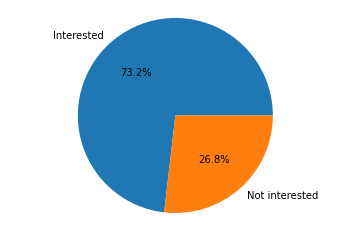

In [198]:
ytrain = pd.read_csv(dataPath + 'y_train.csv')
groups = ytrain.groupby("interested")
df = groups.size().to_frame()

matplotlib.pyplot.pie(df[0].values, labels = ["Interested", "Not interested"], autopct='%1.1f%%')
matplotlib.pyplot.axis('equal')
matplotlib.pyplot.savefig(outputPath + 'classImbalance.png')